# Matplotlib Advanced Plotting Customization

## Importing libraries & Loading DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
df = pd.read_csv('C:/Users/DELL/Desktop/SQL/Data_analysis/data_jobs.csv')

## Data Cleanup

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # This transforms the string into a list  


## Customizing line plot

## Working with job title short of Data Analyst

In [3]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()


## Exploding the job skills

In [4]:
# Create a new column for month number
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_da_explode= df_da.explode('job_skills') 
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sorting the skills by count
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot=df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
# Dropping Total
df_da_pivot = df_da_pivot.drop('Total')
# Use month names for plotting
df_da_pivot.columns = df_da_pivot.columns.map(lambda x: x.title())
df_da_pivot.head()

job_skills,Sql,Excel,Python,Tableau,Power Bi,R,Sas,Powerpoint,Word,Sap,...,Xamarin,Mattermost,Gtx,Esquisse,Chainer,Capacitor,Nuxt.Js,Msaccess,Ovh,Suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Use month name for plotting
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) # This transforms the number into a month example Jan instead of january after creating a new column called job_posted_month_no
df_da_pivot = df_da_pivot.set_index('job_posted_month')
# Dropping job_posted_month_no
df_da_pivot = df_da_pivot.drop('job_posted_month_no', axis=1)

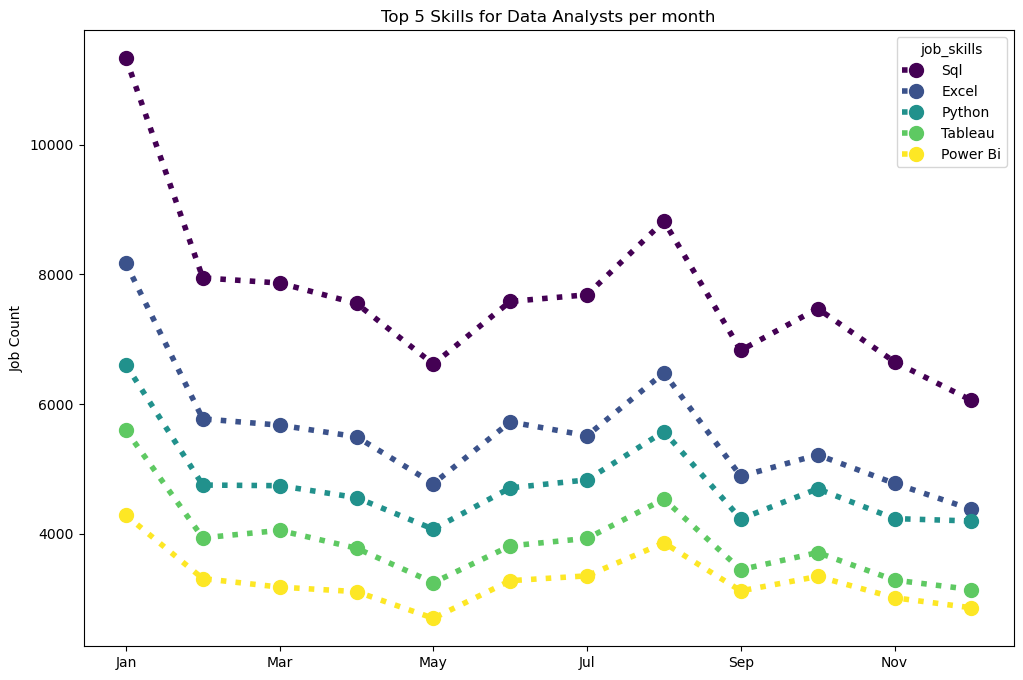

In [6]:
# Get the top 5 skills
df_da_pivot.iloc[:, :5].plot(
  kind='line',
  linewidth=4,
  linestyle='dotted', # options are 'solid', 'dashed', 'dotted', 'dashdot'
  colormap='viridis',
  marker='o', # options are 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'
  markersize=10,
  figsize=(12, 8)
  )
plt.title('Top 5 Skills for Data Analysts per month')
plt.ylabel('Job Count')
plt.xlabel('')
plt.show()


In [58]:
df_da_pivot  

job_skills,Sql,Excel,Python,Tableau,Power Bi,R,Sas,Powerpoint,Word,Sap,...,Xamarin,Mattermost,Gtx,Esquisse,Chainer,Capacitor,Nuxt.Js,Msaccess,Ovh,Suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


## Customizing our Scattered plot

In [34]:
# Explode the job_skills column into individual rows
df_da_explode = df_da.explode('job_skills')
# Calculate the average salary and count of job posting for each skill
#df_da_skill_stats = df_da_explode.groupby('job_skills')['median_salary'].agg(['mean', 'count'])
skill_stats = df_da_explode.groupby('job_skills').agg(skill_count=('job_skills', 'count'), 
 median_salary=('salary_year_avg', 'median'))

# List the top 20 skills
skill_count =20
skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(skill_count)

skill_stats


,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


## Ouputting the plot

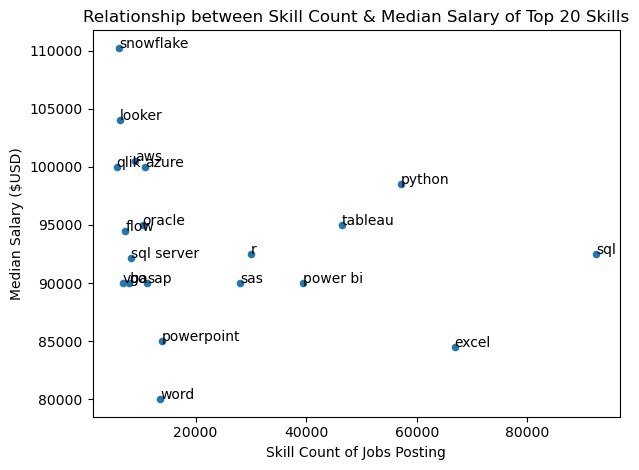

In [35]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title(f'Relationship between Skill Count & Median Salary of Top {skill_count} Skills')
plt.xlabel('Skill Count of Jobs Posting')
plt.ylabel('Median Salary ($USD)')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    #plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()

## Updating the visualisation using special library

<function matplotlib.pyplot.show(close=None, block=None)>

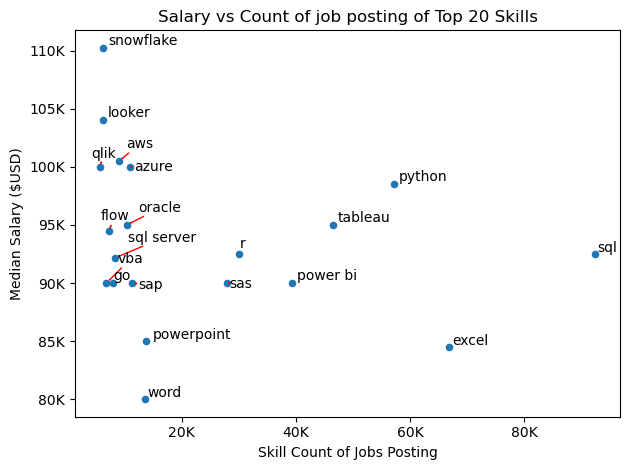

In [ ]:
# Import adjust_text library 
# conda install adjustText if not installed yet
from adjustText import adjust_text
# Plotting
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
# Adjust text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))

# Modifying the figure

ax=plt.gca()
## Formating the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : '{:,.0f}K'.format(y/1000)))

## Formating the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : '{:,.0f}K'.format(x/1000)))

# Set axis labels, title and legend
plt.title(f'Salary vs Count of job posting of Top {skill_count} Skills')
plt.xlabel('Skill Count of Jobs Posting')
plt.ylabel('Median Salary ($USD)')

# Sdjust layout and display plot
plt.tight_layout()  
plt.show
